Important Packages

In [1]:
import nltk
# nltk.download('punkt') # required for tokenization
# nltk.download('stopwords') # required for Stopword Removal
# nltk.download('wordnet')  # required for Lematization

In [2]:
import os
cwd = os.getcwd()
cwd

'D:\\EDUCATION\\EDU\\SEM 6\\NLP'

Getting Training Data

In [3]:
Dir = cwd+"\\DATA\\"

def READ(K):
    C = []
    os.chdir(Dir)
    for files in os.walk("./"+K):
        for filename in files:
            C.append(filename)
    C = C[2]
    Corpus = []
    for i in C:
        file = "./"+K+"//"+i
        print(file)
        f = open(file,'r',encoding="utf8")
        T = f.read()
        Corpus.append(T)
    os.chdir(cwd)
    return Corpus
POS = READ("+");
print("-------------------------------")
NEG = READ("-");

./+//httpsen.wikipedia.orgwikiKumbh_Mela.txt
./+//httpsindianexpress.comarticleexplainedkumbh-mela-2021-mythology-preparations-coronavirus-haridwar-6719596.txt
./+//httpswww.britannica.comtopicKumbh-Mela.txt
./+//httpswww.fortuneindia.compolemicistwhy-the-kumbh-mela-is-an-economic-blessing102900.txt
./+//httpswww.tourmyindia.comkumbhmela.txt
-------------------------------
./-//httpsthewire.ingovernmentkumbh-2021-astrology-mortality-and-the-indifference-to-life-of-leaders-and-stars.txt
./-//httpstimesofindia.indiatimes.comcitydehradunnearly-1300-test-covid-positive-at-kumbh-in-3-days-14-lakh-take-part-in-3rd-shahi-snanarticleshowprint82074940.cms.txt
./-//httpswww.bbc.comnewsworld-asia-india-56770460.txt
./-//httpswww.freepressjournal.invirala-sea-of-followers-at-kumbh-mela-twitteratis-feud-over-corona-politics-continues.txt
./-//httpswww.sciencedirect.comsciencearticlepiiS1198743X14001074.txt


In [4]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

Pre Processing 

In [5]:
def PREPRO(Corpus):
    # 1. Normalization
    lower_corpus = []
    Normalized_corpus = []

    for i in range(len(Corpus)):
        lower_corpus.append(' '.join([word.lower() for word in Corpus[i].split()]))
        
    for i in range(len(lower_corpus)):
        Normalized_corpus.append(' '.join([word for word in lower_corpus[i].split() if word.isalpha()]))
        
    # 2. Tokenization
    tokenized_corpus = []
    for i in range(len(Normalized_corpus)):
        tokenized_corpus.append(word_tokenize(Normalized_corpus[i]))
        
    # 3. Stopword removal
    stop=stopwords.words(fileids='english')
    StopR_corpus = []

    for i in range(len(tokenized_corpus)):
        StopR_corpus.append([word for word in tokenized_corpus[i] if word not in stop])
        
    # 4. Stemming
    ps=PorterStemmer()
    Stemmed_corpus=[]
    for i in range(len(StopR_corpus)):
        Stemmed_corpus.append([ps.stem(word) for word in StopR_corpus[i]])
        
    # 5.Lematization
    #Lemit =[]
    #lemmatizer = WordNetLemmatizer()
    #for i in range(len(Stemmed_corpus)):
    #    Lemit.append([lemmatizer.lemmatize(word) for word in Stemmed_corpus[i]])
    
        
    Corpus = []
    for i in Stemmed_corpus:
        Str =""
        for ele in i: 
            Str += ele+" "
        Corpus.append(Str)
        
    return Corpus


POS = PREPRO(POS) 
NEG = PREPRO(NEG)


Forming DataSet

In [6]:
import pandas as pd
DATA1 = pd.DataFrame(columns=["Flag","Article"])
DATA2 = pd.DataFrame(columns=["Flag","Article"])
for i in POS:
    df2 = {"Flag" : 1,"Article":i}
    DATA1 = DATA1.append(df2,ignore_index = True)
for i in NEG:
    df2 = {"Flag" : 0,"Article":i}
    DATA2 = DATA2.append(df2,ignore_index = True)
    

DATA1["Flag"] = DATA1["Flag"].astype('int')
DATA2["Flag"] = DATA2["Flag"].astype('int')
DATA1 = DATA1.sample(frac=1).reset_index(drop=True)
DATA2 = DATA2.sample(frac=1).reset_index(drop=True)

Spliting Data

In [7]:
Train = DATA1[0:3]
Train = Train.append(DATA2[0:3])
Test = DATA1[3:5]
Test = Test.append(DATA2[3:5])
Train = Train.sample(frac=1).reset_index(drop=True)
Test = Test.sample(frac=1).reset_index(drop=True)

In [8]:
Train 

,Flag,Article
0,0,kumbh mortal indiffer life leader star kumbh h...
1,0,kumbh festiv attract big crowd amid devast sec...
2,0,nearli test covid posit kumbh lakh take part s...
3,1,kumbh also call kumbha religi festiv celebr fo...
4,1,kumbh mela econom bless kumbh mela tremend boo...
5,1,kumbh mela kumbha mela major pilgrimag festiv ...


Extracting Features

In [9]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# cv = TfidfVectorizer(ngram_range=(1,2))
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(1,2))
traindataset = cv.fit_transform(Train["Article"])
N = cv.get_feature_names()
X = traindataset
BOW = pd.DataFrame(X.toarray(),columns=N)
print(BOW.shape)
BOW 

(6, 6258)


,abl,abl instruct,abl visual,abolish,abolish pilgrim,abstain,abstain elabor,academi,academi ikono,access,...,yogic practic,young,young sibl,yudhisthira,yudhisthira state,zodiac,zodiac jupit,zodiac posit,zodiac sign,zodiac word
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,3,0,1,1,1


Making A random Forest Model and Testing Data

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [11]:
Mscore = 0
BK = 0 
SK = []
SS = []
for K in range (100,1001,50):
    Trandomclassifier=RandomForestClassifier(n_estimators=K,criterion='entropy')
    Trandomclassifier.fit(traindataset,Train["Flag"])
    test_dataset = cv.transform(Test["Article"])
    Tpredictions = Trandomclassifier.predict(test_dataset)
    score = accuracy_score(Test["Flag"],Tpredictions)
    SK.append(K)
    SS.append(score)
    if(Mscore < score):
        BK = K
        Mscore = score
        predictions = Tpredictions
        randomclassifier = Trandomclassifier

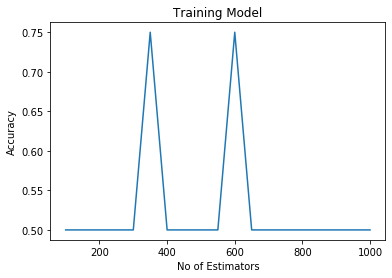

No of Estimators taken :  350


In [12]:
import matplotlib.pyplot as plt 
plt.plot(SK,SS)
plt.title('Training Model')
plt.xlabel('No of Estimators')
plt.ylabel('Accuracy')
plt.show()
print('No of Estimators taken : ',BK)

RESULTS

In [13]:
matrix=confusion_matrix(Test["Flag"],predictions)
print(matrix)
print("________________________________")
score=accuracy_score(Test["Flag"],predictions)
print("Accuracy_score : ",score)
print("________________________________")
report=classification_report(Test["Flag"],predictions)
print(report)

[[2 0]
 [1 1]]
________________________________
Accuracy_score :  0.75
________________________________
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



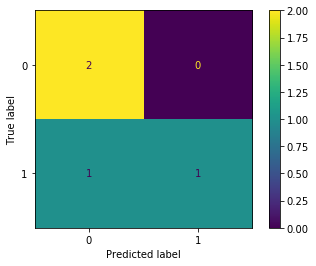

In [14]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(randomclassifier, test_dataset, Test["Flag"])  
plt.show() 

APPLICATION ON TWEET ANALYSIS

In [15]:
from pywebcopy import save_webpage
import time
import threading

url = 'https://twitter.com/search?q=kumbh%20mela&src=typed_query'
download_folder = cwd    
kwargs = {'bypass_robots': True, 'project_name': 'Tweet Analysis'}

def DOWN():
    save_webpage(url, download_folder, **kwargs)


t = threading.Thread(target=DOWN)
t.daemon = True
t.start()

time.sleep(20)

pywebcopy.configs - INFO     - Got response 200 from https://twitter.com/robots.txt
C:\Users\Public\anaconda3\lib\site-packages\pywebcopy\webpage.py:84: UserWarning: Global Configuration is not setup. You can ignore this if you are going manual.This is just one time warning regarding some unexpected behavior.
  "Global Configuration is not setup. You can ignore this if you are going manual."
pywebcopy.configs - INFO     - Got response 200 from https://twitter.com/search?q=kumbh%20mela&src=typed_query
webpage    - INFO     - Starting save_complete Action on url: ['https://twitter.com/search?q=kumbh%20mela&src=typed_query']
parsers    - INFO     - Parsing tree with source: <<urllib3.response.HTTPResponse object at 0x000002C1D931FF08>> encoding <utf-8> and parser <<lxml.etree.HTMLParser object at 0x000002C1D92F4408>>
webpage    - INFO     - Starting save_assets Action on url: 'https://twitter.com/search?q=kumbh mela&src=typed_query'
webpage    - Level 100 - Queueing download of <272> asse

In [16]:
file = cwd+'\\Tweet Analysis\\twitter.com'
C = []
for files in os.walk(file):
    for filename in files:
        C.append(filename)
C = C[2][0]
C

'4845791a__search.html'

In [17]:
from bs4 import BeautifulSoup
os.chdir(file)
response =  open(C)
Data = response.read()
response.close()
os.chdir(cwd)
soup = BeautifulSoup(Data, 'html.parser')

In [18]:
tweets = soup.find_all("p",{"class": "TweetTextSize js-tweet-text tweet-text","lang": "en"})
Tweet = []
for T in tweets:
    Tweet.append(T.text)
print("Total Fetched Tweets in English : ",len(Tweet))

Total Fetched Tweets in English :  20


In [19]:
print(Tweet[4])

For Rahul ji 

Kumbh Mela = Corona positive 

Bengal rallies = Corona positive 

But 

Kisan andolan jeevis on Delhi borders & Punjab = Corona proof 

Rallies in Ajmer to demand beheading = Corona proof

Funeral gathering for father of Mohd Saleh R’than minister = Corona proof pic.twitter.com/Z62IEEmLOT


In [20]:
ATweet = Tweet

In [21]:
Tweet = PREPRO(Tweet)

In [22]:
Tweet = pd.DataFrame(Tweet,columns=["Tweets"])
ATweet = pd.DataFrame(ATweet,columns=["Tweets"])

In [23]:
test_dataset = cv.transform(Tweet["Tweets"])
predictions = randomclassifier.predict(test_dataset)
ATweet["Predictions"] = pd.DataFrame(predictions)
ATweet

,Tweets,Predictions
0,Hajj was banned in Saudi Arabia when deaths we...,0
1,Despite the 1800% increase in Uttarkhand’s act...,0
2,Kumbh Mela was a super spreader just like ele...,0
3,This should have been biggest headline in Indi...,0
4,For Rahul ji \n\nKumbh Mela = Corona positive ...,0
5,Data proves beyond doubt that so called farmer...,0
6,first kumbh mela where the attendees might act...,0
7,"After nine straight days of 300,000+ Covid cas...",0
8,Vaccination was more important than election r...,0
9,"Poonawalla: “If I give you the right answer, o...",0


In [24]:
test_dataset

<20x6258 sparse matrix of type '<class 'numpy.int64'>'
	with 210 stored elements in Compressed Sparse Row format>

In [25]:
for index, row in ATweet.iterrows():
    print(row['Tweets'])
    print("_________________________________")
    print("Sentiments => ",end="  ")
    if row['Predictions'] == 0 :
        print("Negative")
    else:
        print("Positive")
    print("_________________________________")
    print("---------------------------------------------------------")

Hajj was banned in Saudi Arabia when deaths were only 350, Kumbh Mela was allowed in India when deaths were 1,60,983. 

Today- 
Deaths in Saudi - 6,957.
Deaths in India - 211,835.
_________________________________
Sentiments =>   Negative
_________________________________
---------------------------------------------------------
Despite the 1800% increase in Uttarkhand’s active COVID-19 cases in the period coinciding with the Kumbh Mela, the state government has given its green signal to hold the annual Char Dham yatra from May 14.

https://thewire.in/health/uttarakhand-sharp-spike-covid-19-cases-char-dham-yatra-kumbh-mela …
_________________________________
Sentiments =>   Negative
_________________________________
---------------------------------------------------------
Kumbh Mela was a super spreader  just like election rallies in WB which were purposefully allowed by GOI!!!! pic.twitter.com/Y6P86azfeK
_________________________________
Sentiments =>   Negative
_____________________

In [26]:
C = list(ATweet.isin([0]).sum())
C = C[1]
N = ATweet.shape[0]
X1 = ((N-C)/N)*100 
X0 = ((C)/N)*100
print("Tweet Analysis On Topic - Kumbh Mela in Covid")
print("Positive : ",X1 ,"%")
print("Negative : ",X0 ,"%")

Tweet Analysis On Topic - Kumbh Mela in Covid
Positive :  0.0 %
Negative :  100.0 %
